## 1. Introduction and Objective
The banking sector plays a significant role in the economy of India. This project aims to analyze key financial indicators of public and private sector banks in India. We'll use data science techniques to:

Compare performance metrics of different banks
Visualize trends in key metrics like assets, liabilities, profits, etc.
Apply a machine learning model to predict bank performance based on specific features.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = {
    'Bank Name': ['SBI', 'HDFC', 'ICICI', 'PNB', 'Axis Bank', 'Canara Bank', 'Kotak Mahindra', 'Bank of Baroda', 'Yes Bank', 'IDBI'],
    'Sector': ['Public', 'Private', 'Private', 'Public', 'Private', 'Public', 'Private', 'Public', 'Private', 'Public'],
    'Total Assets': [500000, 450000, 430000, 350000, 400000, 300000, 310000, 320000, 220000, 200000],  # In crores
    'Liabilities': [300000, 270000, 250000, 200000, 230000, 190000, 180000, 170000, 150000, 140000],  # In crores
    'Profit': [10000, 15000, 12000, 8000, 11000, 6000, 7000, 9000, 2000, 3000],  # In crores
    'NPA': [3.5, 1.8, 2.1, 4.5, 2.0, 4.0, 1.5, 3.8, 5.5, 5.0],  # Non-Performing Assets (NPA) percentage
    'Market Share': [23.5, 10.1, 9.7, 8.9, 7.6, 6.2, 4.9, 6.8, 2.5, 2.0]  # Market share percentage
}

df = pd.DataFrame(data)

df.head()


,Bank Name,Sector,Total Assets,Liabilities,Profit,NPA,Market Share
0,SBI,Public,500000,300000,10000,3.5,23.5
1,HDFC,Private,450000,270000,15000,1.8,10.1
2,ICICI,Private,430000,250000,12000,2.1,9.7
3,PNB,Public,350000,200000,8000,4.5,8.9
4,Axis Bank,Private,400000,230000,11000,2.0,7.6


## Statistical Summary

In [22]:
df.describe()


,Total Assets,Liabilities,Profit,NPA,Market Share
count,10.000000,10.00000,10.000000,10.000000,10.000000
mean,348000.000000,208000.00000,8300.000000,3.370000,8.220000
std,97616.027828,52873.01349,4001.388648,1.434534,6.042222
min,200000.000000,140000.00000,2000.000000,1.500000,2.000000
25%,302500.000000,172500.00000,6250.000000,2.025000,5.225000
50%,335000.000000,195000.00000,8500.000000,3.650000,7.200000
75%,422500.000000,245000.00000,10750.000000,4.375000,9.500000
max,500000.000000,300000.00000,15000.000000,5.500000,23.500000


## Profit Distribution among banks

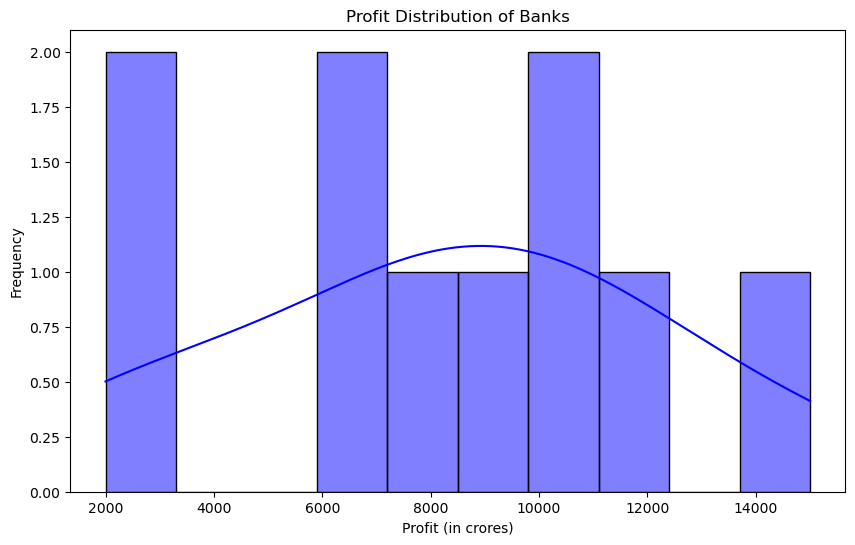

In [26]:
# Profit distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(df['Profit'], bins=10, kde=True, color='blue')
plt.title('Profit Distribution of Banks')
plt.xlabel('Profit (in crores)')
plt.ylabel('Frequency')
plt.show()


## NPA Vs Profit

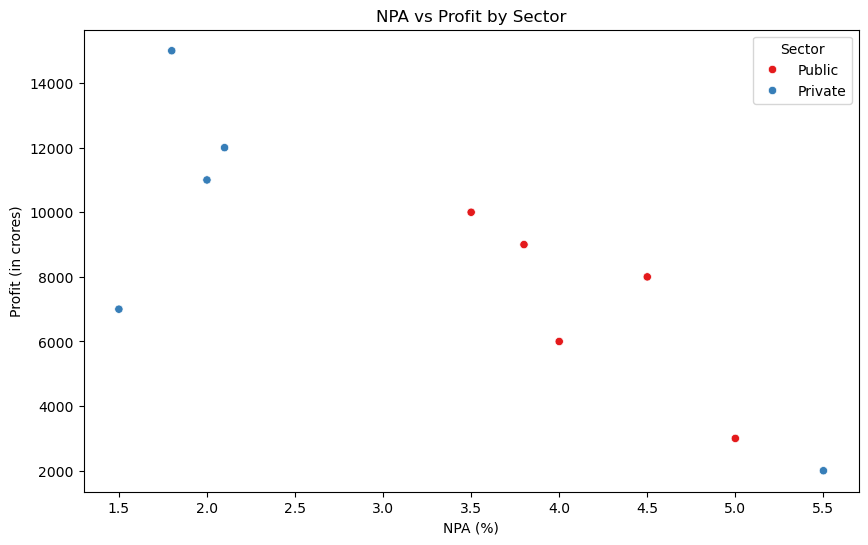

In [28]:
# Scatter plot for NPA vs Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NPA', y='Profit', hue='Sector', data=df, palette='Set1')
plt.title('NPA vs Profit by Sector')
plt.xlabel('NPA (%)')
plt.ylabel('Profit (in crores)')
plt.show()


## Market Share of Banks

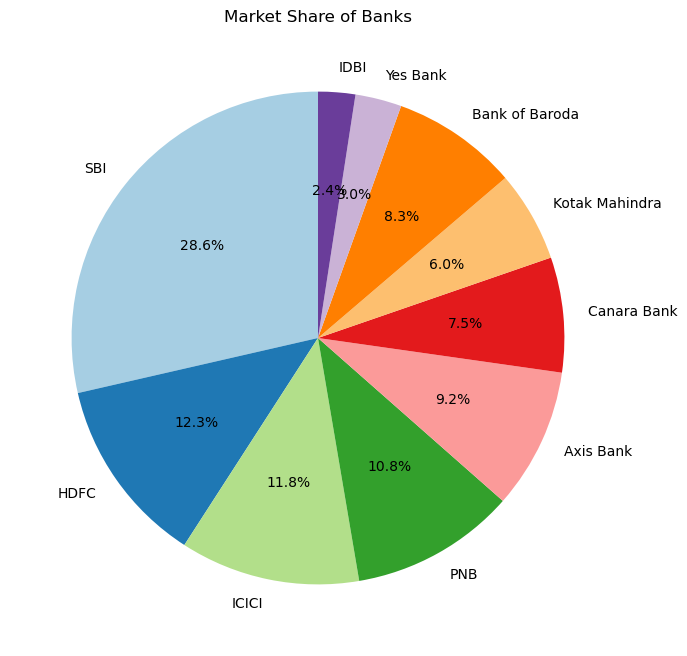

In [30]:
# Pie chart of market share by bank
plt.figure(figsize=(8, 8))
plt.pie(df['Market Share'], labels=df['Bank Name'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Paired', 10))
plt.title('Market Share of Banks')
plt.show()


## Machine Learning model for predicting bank profit

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


X = df[['Total Assets', 'Liabilities', 'NPA', 'Market Share']]
y = df['Profit']

scaler = StandardScaler()
scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Mean Squared Error: 9099733.333333334
Accuracy Score : 0.6921142857142857


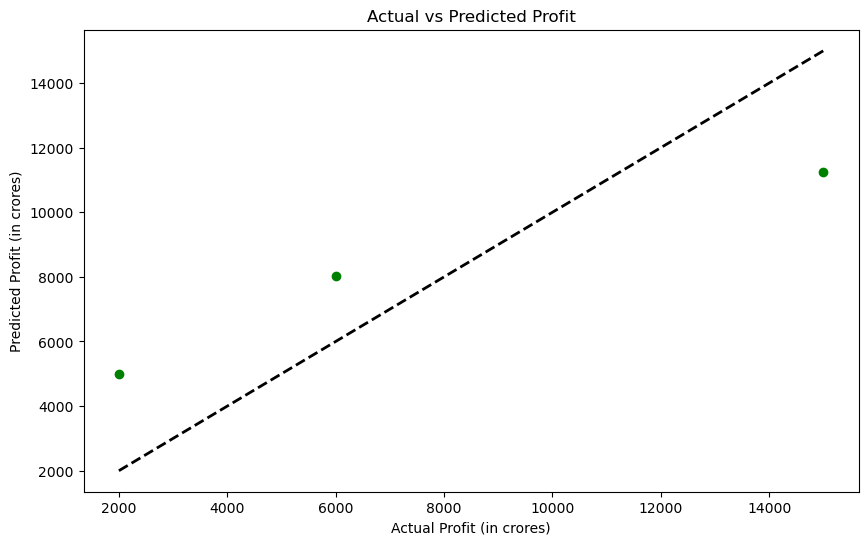

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print("Accuracy Score :",r2_score(y_test , y_pred))

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Actual vs Predicted Profit')
plt.xlabel('Actual Profit (in crores)')
plt.ylabel('Predicted Profit (in crores)')
plt.show()

Mean Squared Error: 7000000.0
Accuracy Score : 0.7631578947368421


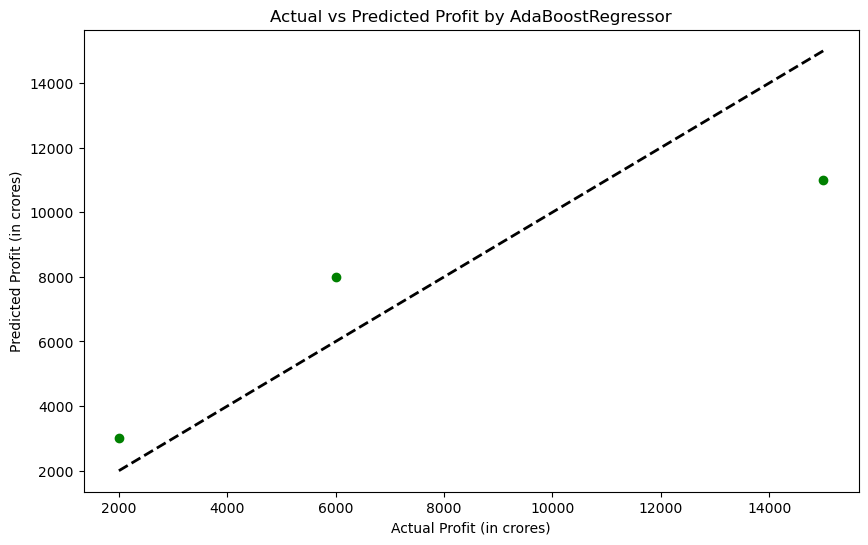

Mean Squared Error: 3816838.693965625
Accuracy Score : 0.8708588411816142


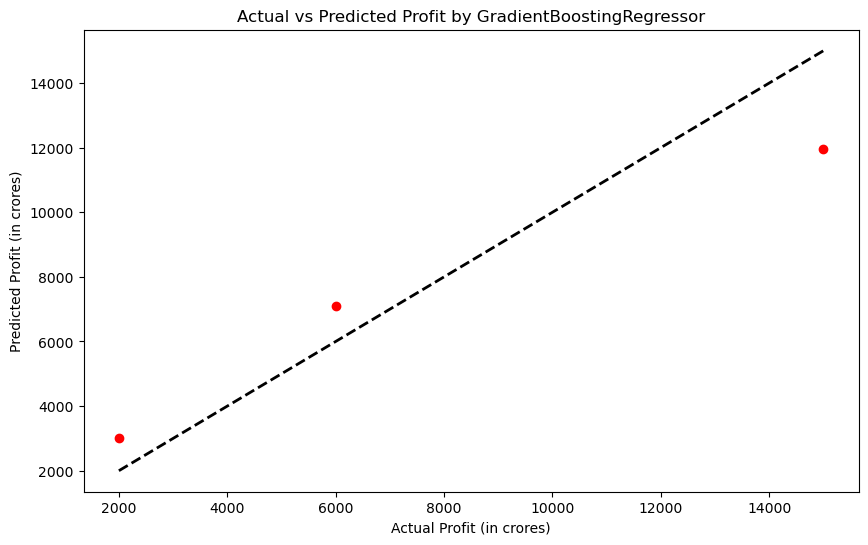

In [46]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model1 = AdaBoostRegressor(n_estimators=100, random_state=4)
model2 = GradientBoostingRegressor(n_estimators=100, random_state=42)
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)

mse1 = mean_squared_error(y_test, y_pred1)
mse2 = mean_squared_error(y_test, y_pred2)
print(f"Mean Squared Error: {mse1}")
print("Accuracy Score :",r2_score(y_test , y_pred1))

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred1, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Actual vs Predicted Profit by AdaBoostRegressor')
plt.xlabel('Actual Profit (in crores)')
plt.ylabel('Predicted Profit (in crores)')
plt.show()

print(f"Mean Squared Error: {mse2}")
print("Accuracy Score :",r2_score(y_test , y_pred2))

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred2, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Actual vs Predicted Profit by GradientBoostingRegressor')
plt.xlabel('Actual Profit (in crores)')
plt.ylabel('Predicted Profit (in crores)')
plt.show()

## Conclusion
In this project, we successfully created a synthetic dataset to analyze the Indian banking sector. We visualized the key financial metrics of public and private banks, compared trends, and implemented a Random Forest Regression model, AdaboostRegressor and Gradient Boosting Regressor to predict bank profits. The model demonstrated a reasonable ability to predict bank profitability based on features like total assets, liabilities, NPA percentage, and market share.

Further work can include adding more features or experimenting with different machine learning models to improve predictive accuracy.

The accuracy have been improved by Gradient Bossting Regressor Model and Adaboost Regressor Model.